# **Chapter 0**


In [1]:
!nvidia-smi

Fri Jul  7 19:04:44 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.23                 Driver Version: 536.23       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   51C    P0              14W /  50W |    160MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(torch.__version__)

2.0.1+cu118


## **Introduction to tensors**
* ###  Creating tensors






In [3]:
# scalar
scalar  = torch.tensor(7)
scalar

tensor(7)

In [4]:
scalar.ndim   # Number of Dimensions

0

In [5]:
scalar.item()    # Extract from Tensor

7

In [6]:
# Vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [7]:
vector.ndim

1

In [8]:
vector.shape

torch.Size([2])

In [9]:
# MATRIX
MATRIX = torch.tensor([[1,2,3], [4,5,6]])
MATRIX

tensor([[1, 2, 3],
        [4, 5, 6]])

In [10]:
MATRIX.ndim

2

In [11]:
MATRIX.shape

torch.Size([2, 3])

In [12]:
MATRIX[0]

tensor([1, 2, 3])

In [13]:
# TENSOR
TENSOR = torch.tensor([[[1,2,3,4],
                        [4,5,6,4],
                        [7,8,9,4]]])
TENSOR

tensor([[[1, 2, 3, 4],
         [4, 5, 6, 4],
         [7, 8, 9, 4]]])

In [14]:
TENSOR.ndim

3

In [15]:
TENSOR.shape

torch.Size([1, 3, 4])

In [16]:
TENSOR[0]

tensor([[1, 2, 3, 4],
        [4, 5, 6, 4],
        [7, 8, 9, 4]])

In [17]:
TENSOR[0][0]

tensor([1, 2, 3, 4])

## **Random Tensors**

In essence:

`Start with random numbers -> look at data -> update random numbers -> look at data -> update random numbers...`

In [18]:
# Random Tensors
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.2559, 0.9967, 0.8020, 0.1350],
        [0.0436, 0.3599, 0.9476, 0.5924],
        [0.4108, 0.1766, 0.9967, 0.9053]])

In [19]:
# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224, 224, 3)) # height, width, colour channels (R,G,B)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

## **Zeros and ones**

In [20]:
# Create tensor of all zeroes
zeros = torch.zeros(3, 4)
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [21]:
# Create tensor of all ones
ones = torch.ones(3, 4)
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [22]:
ones.dtype

torch.float32

## **Creating a range of tensors and tensors-like**


In [23]:
# Use torch.arange()
one_to_ten = torch.arange(1, 11, 1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [24]:
# Creating tensors like
ten_zeros = torch.zeros_like(one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## **Tensor Datatypes**
**Note :** Tensor datatypes is one of the big errors you'll run to with PyTorch & deep learning:
1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device

In [25]:
# FLoat 32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None,          # What datatype is the Tensor?
                               device=None,         # What device is your tensor on?
                               requires_grad=False) # Whether or not to track gradients wiht this tensors operations?
float_32_tensor

tensor([3., 6., 9.])

In [26]:
float_32_tensor.dtype

torch.float32

In [27]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [28]:
float_16_tensor*float_32_tensor

tensor([ 9., 36., 81.])

In [29]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.int32)                  # INT 32 ==>  torch.int32 or torch.int
int_32_tensor                                                               # INT 64 ==>  torch.int64 or torch.long

tensor([3, 6, 9], dtype=torch.int32)

In [30]:
float_32_tensor*int_32_tensor

tensor([ 9., 36., 81.])

## **Getting information from tensors**

1. Tensors not right datatype - to do get datatype from a tensor, can use `tensor.dtype`
2. Tensors not right shape - to get shape from a tensor, can use `tensor.shape`
3. Tensors not on the right device - to get device from a tensor, can use `tensor.device`

In [31]:
# Create a tensor
some_tensor = torch.rand(3, 4)
some_tensor

tensor([[0.8580, 0.9999, 0.4006, 0.7054],
        [0.3719, 0.3038, 0.9160, 0.9244],
        [0.1491, 0.0530, 0.0664, 0.2937]])

In [32]:
# Find out details about some tensor
print(some_tensor)
print(f"Datatype of tensor : {some_tensor.dtype}")
print(f"Shape of tensor : {some_tensor.shape}")
print(f"Device of tensor : {some_tensor.device}")

tensor([[0.8580, 0.9999, 0.4006, 0.7054],
        [0.3719, 0.3038, 0.9160, 0.9244],
        [0.1491, 0.0530, 0.0664, 0.2937]])
Datatype of tensor : torch.float32
Shape of tensor : torch.Size([3, 4])
Device of tensor : cpu


## **Manipulating Tensors (tensor operations)**

Tensor operations include:
* Addition
* Substraction
* Multiplication (element-wise)
* Division
* Matrix Multiplication

In [33]:
# Create a tensor
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [34]:
# Multiply tensor by 10
tensor * 10

tensor([10, 20, 30])

In [35]:
# Substract 10
tensor - 10

tensor([-9, -8, -7])

In [36]:
# Try out PyTorch in-built functions
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [37]:
torch.add(tensor, 10)

tensor([11, 12, 13])

## **Matrix Multiplication**

Two main ways of performing multiplication in neural networks and deep learning:

1. Element-wise multiplication
2. Matrix multiplication (dot product)

There are two main rules that performing matrix multiplication needs to satisfy:
1. The **inner dimensions** must match:
* `(3, 2) @ (3, 2)` won't work
* `(2, 3) @ (3, 2)` will work
* `(3, 2) @ (2, 3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
* `(2, 3) @ (3, 2)` -> `(2, 2)`
* `(3, 2) @ (2, 3)` -> `(3, 3)`

In [38]:
torch.matmul(torch.rand(3, 10), torch.rand(10, 3)).shape

torch.Size([3, 3])

In [39]:
# Element wise multiplication
print(tensor, "*", tensor)
print(f"Equals : {tensor*tensor}")

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals : tensor([1, 4, 9])


In [40]:
tensor @ tensor

tensor(14)

In [41]:
torch.matmul(tensor, tensor)

tensor(14)

In [42]:
# Matrix multiplication by hand
1*1 + 2*2 + 3*3

14

In [43]:
%%time
value = 0
for i in range(len(tensor)):
    value += tensor[i]*tensor[i]
value

CPU times: total: 0 ns
Wall time: 2.51 ms


tensor(14)

In [44]:
%%time
torch.matmul(tensor, tensor)

CPU times: total: 0 ns
Wall time: 0 ns


tensor(14)

## **One of the most common errors in deep learning: shape errors**

In [45]:
# Shapes for matrix multiplication
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]])

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]])

# torch.mm(tensor_A, tensor_B) # torch.mm is the same as torch.matmul (it's an alias for writing less code)
torch.matmul(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

In [46]:
tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

To fix our tensor shape issues, we can manipulate the shape of one of our using a **transpose**.

A **transpose** switches the axes or dimensions of a given tensor.

In [47]:
tensor_B, tensor_B.shape

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]),
 torch.Size([3, 2]))

In [48]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 torch.Size([2, 3]))

In [49]:
#The matrix multiplication operation works when tensor_B is transposed
print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}")
print(f"New shapes : tensor_A = {tensor_A.shape} (same shape as above), tensor_B.T = {tensor_B.T.shape}")
print(f"Multiplying: {tensor_A.shape} @ {tensor.shape} <- inner dimensions must match")
print("Output:\n")
output = torch.matmul(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape : {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])
New shapes : tensor_A = torch.Size([3, 2]) (same shape as above), tensor_B.T = torch.Size([2, 3])
Multiplying: torch.Size([3, 2]) @ torch.Size([3]) <- inner dimensions must match
Output:

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

Output shape : torch.Size([3, 3])


## **Finding the min, max, mean, sum, etc (tensor aggregation)**

In [50]:
# Create a tensor
x = torch.arange(1, 100, 10)
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [51]:
# Find the min
torch.min(x), x.min()

(tensor(1), tensor(1))

In [52]:
# Find the max
torch.max(x), x.max()

(tensor(91), tensor(91))

In [53]:
# Find the mean - note: the torch.mean() functions requires a tensor of float32 datatype to work
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(46.), tensor(46.))

In [54]:
# Find the sum
torch.sum(x), x.sum()

(tensor(460), tensor(460))

## **Finding the positional min and max**

In [55]:
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [56]:
# Find the position in tensor that has the minimum value with argmin() -> returns index position of target tensor where the minimum value occurs.
x.argmin()

tensor(0)

In [57]:
x[0]

tensor(1)

In [58]:
# Find the position in tensor that has the maxmum value with argmax() -> returns index position of target tensor where the maximum value occurs.
x.argmax()

tensor(9)

In [59]:
x[9]

tensor(91)

## **Reshaping, stacking, squeezing and unsqueezing tensors**

* Reshaping - reshapes an input tensor to a defined shape
* View - return a view of an input tensor of certain shape but keep the same memory as the original tensor
* Stacking - combine multiple tensors on top of each other (vstack) or side by side (hstack)
* Squeeze - removes all `1` dimensions from a tensor
* Unsqueeze - add a `1` dimension to a target tensor
* Permute - return a view of the input with dimensions permuted (swapped) in a certain way

In [60]:
# Let's create
x = torch.arange(1., 11.)
x, x.shape, x.dtype

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 torch.Size([10]),
 torch.float32)

In [61]:
# Add an extra dimension
x_reshaped = x.reshape(5, 2)
x_reshaped, x_reshaped.shape

(tensor([[ 1.,  2.],
         [ 3.,  4.],
         [ 5.,  6.],
         [ 7.,  8.],
         [ 9., 10.]]),
 torch.Size([5, 2]))

In [62]:
# Change the view
z = x.view(1, 10)
z, z.shape

(tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]]),
 torch.Size([1, 10]))

In [63]:
# Changing z changes x (because a view of a tensor shares the same memory as the original input)
z[:, 5] = 5
z, x

(tensor([[ 1.,  2.,  3.,  4.,  5.,  5.,  7.,  8.,  9., 10.]]),
 tensor([ 1.,  2.,  3.,  4.,  5.,  5.,  7.,  8.,  9., 10.]))

In [64]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim = 1)
x_stacked

tensor([[ 1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.],
        [ 5.,  5.,  5.,  5.],
        [ 7.,  7.,  7.,  7.],
        [ 8.,  8.,  8.,  8.],
        [ 9.,  9.,  9.,  9.],
        [10., 10., 10., 10.]])

In [65]:
# torch.squeeze() - removes all the single dimensions from a target tensor
print(f"Previous tensor : {z}")
print(f"Previous shape : {z.shape}")

z_squeezed = z.squeeze()

# Remove extra dimensions from z
print(f"\nPrevious tesnor : {z_squeezed}")
print(f"Previous shape : {z_squeezed.shape}")

Previous tensor : tensor([[ 1.,  2.,  3.,  4.,  5.,  5.,  7.,  8.,  9., 10.]])
Previous shape : torch.Size([1, 10])

Previous tesnor : tensor([ 1.,  2.,  3.,  4.,  5.,  5.,  7.,  8.,  9., 10.])
Previous shape : torch.Size([10])


In [66]:
# torch.unsqueeze() - adds a single dimension to a target tensor at a specific dim (dimensions)
print(f"Previous tensor : {z_squeezed}")
print(f"Previous shape : {z_squeezed.shape}")

z_unsqueezed = z_squeezed.unsqueeze(dim=0)

# Add an extra dimension with unsqueeze
print(f"\nPrevious tesnor : {z_unsqueezed}")
print(f"Previous shape : {z_unsqueezed.shape}")

Previous tensor : tensor([ 1.,  2.,  3.,  4.,  5.,  5.,  7.,  8.,  9., 10.])
Previous shape : torch.Size([10])

Previous tesnor : tensor([[ 1.,  2.,  3.,  4.,  5.,  5.,  7.,  8.,  9., 10.]])
Previous shape : torch.Size([1, 10])


In [67]:
# torch.permute() - rearranges the dimensions of a target tensor in a specified order
x_original = torch.rand([224, 224, 3]) #[height, width, colour_channels]

# Permute the original tensor to arrange the axis (or dim) order
x_permuted = torch.permute(x_original, (2, 0, 1)) #Shifts axis 0->1, 1->2, 2->0

print(f"Previous shape : {x_original.shape}")
print(f"New shape : {x_permuted.shape}") #[colour_channels, height, width]

Previous shape : torch.Size([224, 224, 3])
New shape : torch.Size([3, 224, 224])


##Indexing  (selecting data from tensors)
Indexing with Pytorch is similar to indexing with NumPy

In [68]:
# Create a tensor
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [69]:
# Let's index our new tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [70]:
# Let's index on middle bracket (dim=1)
x[0, 0]        # or X[0][0]

tensor([1, 2, 3])

In [71]:
# Let's index on most inner bracket (last dimension)
x[0][2][2]

tensor(9)

In [72]:
# You can also use ":" to select "all" of a target dimension
x[0, :, 2]

tensor([3, 6, 9])

## PyTorch tensors & Numpy

Numpy is a popular scientific Python numerical computing Library.

And because of this, PyTorch has functionality to interact with it.

* Data in Numpy, want in PyTorch tensor -> `torch.from_numpy(ndarray)`
* PyTorch tensor -> NumPy -> `torch.Tensor.numpy()`

In [73]:
# NumPy array to tensor
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array) #Warning : when converting from numpy -> pytorch, pytorch reflects numpy's default datatype of float64 unless specified otherwise
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [74]:
# Change the value of array, what will this do to `tensor`?
array = array+1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [75]:
# Tensor to NumPy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [76]:
# Change the tensor, what happens to `numpy_tensor`?
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take random out of random)

In short how a neural network learns:

`start with random numbers -> tensor operations -> update random numbers to try and make them of the data -> again -> again -> again...`

To reduce the randomness in neural networks and PyTorch comes the concept of a **random seed**.

Essentially what the random seed does is "flavour" the randomness.

In [77]:
# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3 ,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.7977, 0.7972, 0.6827, 0.7126],
        [0.3637, 0.8622, 0.9310, 0.3562],
        [0.2261, 0.1454, 0.2442, 0.1874]])
tensor([[0.9471, 0.8151, 0.6531, 0.3638],
        [0.5428, 0.3216, 0.8840, 0.2941],
        [0.5287, 0.4622, 0.5977, 0.8956]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [78]:
# Let's make some random but reproducible tensors

# Set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)
torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tensors and PyTorch pbjects on the GPUs (and making faster computations)

GPUs = faster computations on numbers, thanks to CUDA + NVIDIA hardware + PyTorch working behind the scenes to make everything hunky dory (good).

### 1. Getting a GPU

1. Easiest - Use Google Colab for a free GPU (options to upgrade as well)
2. Use your own GPU - takes a little bit of setup and requires the investment of purchasing a GPU, there's lots of option...
3. Use cloud computing - GCP, AWS, Azure, these services allow you to rent the computers on the cloud and access them.

For 2, 3 PyTorch + CUDA drives (CUDA) takes a liitle bit of setting up, to do this.

In [79]:
!nvidia-smi

Fri Jul  7 19:04:51 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.23                 Driver Version: 536.23       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   52C    P0              14W /  50W |    266MiB /  4096MiB |      4%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 2. Check for GPU access with PyTorch


In [80]:
# Check for GPU access with PyTorch
torch.cuda.is_available()

True

In [81]:
# Setup device agnoistic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [82]:
# Count number of devices
torch.cuda.device_count()

1

## 3. Putting tensors (and models) on the GPU

The reason we want our tensors/models on the GPU is because using a GPU results in faster computations.

In [83]:
# Create a tensor (default on the CPU)
tensor = torch.tensor([1,2,3])

# Tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [84]:
# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

## 4. Moving tensors back to the CPU

If tensor is on GPU, can't transform it to NumPy

`tensor_on_gpu.numpy()`  <-  ERROR

`TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.`

In [85]:
# To fix the GPU tensor with NumPy issue, we can first set it to the CPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3], dtype=int64)

## Exercises & Extra-curriculum

In [86]:
random_tensor = torch.rand(7, 7)
random_tensor

tensor([[0.8694, 0.5677, 0.7411, 0.4294, 0.8854, 0.5739, 0.2666],
        [0.6274, 0.2696, 0.4414, 0.2969, 0.8317, 0.1053, 0.2695],
        [0.3588, 0.1994, 0.5472, 0.0062, 0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090, 0.5779, 0.9040, 0.5547, 0.3423],
        [0.6343, 0.3644, 0.7104, 0.9464, 0.7890, 0.2814, 0.7886],
        [0.5895, 0.7539, 0.1952, 0.0050, 0.3068, 0.1165, 0.9103],
        [0.6440, 0.7071, 0.6581, 0.4913, 0.8913, 0.1447, 0.5315]])

In [87]:
random_tensor_A = torch.rand(1, 7)
torch.matmul(random_tensor, random_tensor_A.T)

tensor([[1.9625],
        [1.0950],
        [0.9967],
        [1.8910],
        [1.9205],
        [1.0674],
        [1.6949]])

In [88]:
random_seed = 0
torch.manual_seed(random_seed)

random_tensor = torch.rand(7, 7)
print(random_tensor)

torch.manual_seed(random_seed)

random_tensor_A = torch.rand(1, 7)
print(random_tensor_A)

matrix_product_tensor = torch.matmul(random_tensor, random_tensor_A.T)
print(matrix_product_tensor)

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901],
        [0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
        [0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783]])
tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901]])
tensor([[1.5985],
        [1.1173],
        [1.2741],
        [1.6838],
        [0.8279],
        [1.0347],
        [1.2498]])


In [89]:
torch.cuda.manual_seed(1234)
random_gpu_tensor_A = torch.rand(2, 3, device=device)
print(f"Random tensor A on GPU : {random_gpu_tensor_A}")

torch.cuda.manual_seed(1234)
random_gpu_tensor_B = torch.rand(2, 3, device=device)
print(f"Random tensor B on GPU : {random_gpu_tensor_B}")

matrix_product_tensor_gpu = torch.matmul(random_gpu_tensor_A, random_gpu_tensor_B.T)
print(f"\nRandom tensor matrix multiplication : {matrix_product_tensor_gpu}")

Random tensor A on GPU : tensor([[0.1272, 0.8167, 0.5440],
        [0.6601, 0.2721, 0.9737]], device='cuda:0')
Random tensor B on GPU : tensor([[0.1272, 0.8167, 0.5440],
        [0.6601, 0.2721, 0.9737]], device='cuda:0')

Random tensor matrix multiplication : tensor([[0.9792, 0.8358],
        [0.8358, 1.4578]], device='cuda:0')


In [90]:
print(f"Maximum : {matrix_product_tensor_gpu.max()}")
print(f"Maximum Index : {matrix_product_tensor_gpu.argmax()}")
print(f"Minimum : {matrix_product_tensor_gpu.min()}")
print(f"Minimum Index : {matrix_product_tensor_gpu.argmin()}")

Maximum : 1.4577524662017822
Maximum Index : 3
Minimum : 0.8358409404754639
Minimum Index : 1


In [91]:
random_seed = 7
torch.manual_seed(random_seed)

random_tensor = torch.rand(1, 1, 1, 10)
print(f"Random tensor : {random_tensor}")
print(f"Random tensor size : {random_tensor.shape}")

new_random_tensor = random_tensor.squeeze()
print(f"Random tensor : {new_random_tensor}")
print(f"Random tensor size : {new_random_tensor.shape}")

Random tensor : tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]])
Random tensor size : torch.Size([1, 1, 1, 10])
Random tensor : tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513])
Random tensor size : torch.Size([10])


# Chapter 1

In [92]:
what_were_covering = {1 : "data (prepare and load)",
                      2 : "build model",
                      3 : "fitting the model to data (training)",
                      4 : "making predictions and evaluating a model (inference)",
                      5 : "saving and loading a model",
                      6 : "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [93]:
from torch import nn # nn contain all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:

1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [94]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight*X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets (one of the most important concept in machine learning in general)

Let's create a training and test set with our data

In [95]:
# Create a train/ test split
train_split = int(0.8*len(X))

X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [96]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """

    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size":14})

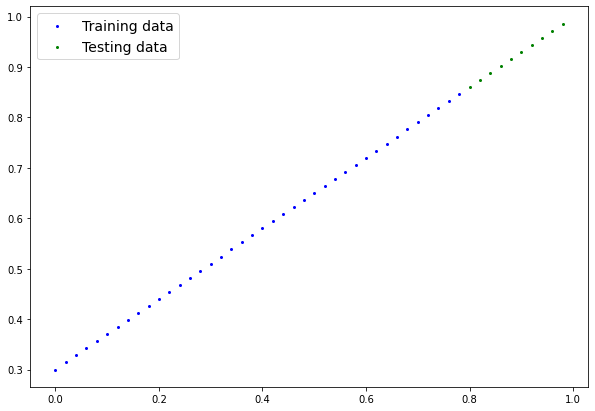

In [97]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

This is very exciting... let's do it!

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1.   Gradient descent
2.   Backpropagation

In [98]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights*x + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - These base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.

In [99]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [100]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [101]:
# Ideal values
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `Y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [102]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [103]:
# Make predictions with model
with torch.inference_mode():
    Y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(), however, inference_mode() is preferred
# with torch.no_grad():
#     Y_preds = model_0(X_test)

Y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

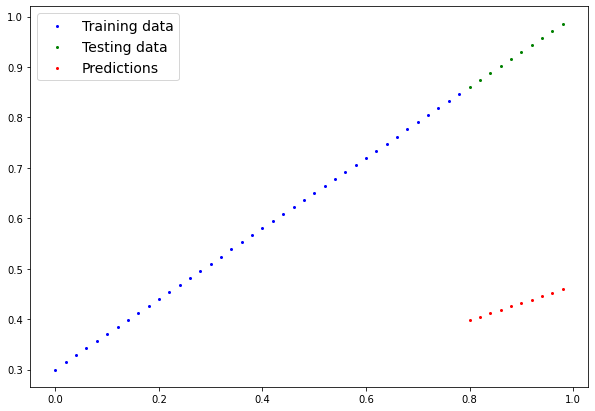

In [104]:
plot_predictions(predictions = Y_preds)

## 3. Train model

The whole idea of training is for a model to move from some *unknown* paramters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjust the model's parameters (e.g. weight & bias in our case) to improve the loss function.
    * Inside the optimizer you'll often have to set two parameters:
        * `params` - the mode parameters you'd like to optimize, for example `params=model_0.parameters()`
        * `lr` (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [105]:
torch.mean(torch.abs(Y_preds-Y_test))           # Mean Absolute Error

tensor(0.4945)

In [106]:
# Setup a loss function
loss_fn = nn.L1Loss()       # Mean Absolute Error

# Setup an optimizer  (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

>   **Q:** Which loss function and optimizer should I use?
>
>    **A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.
>
>    For example, for a regression problem (like ours), a loss function of nn.L1Loss() and an optimizer like `torch.optim.SGD()` will suffice.
>
>    But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do ...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [107]:
# An epochs is one loop through the data ... (this a hyperparameter because we've set it ourselves)
epochs = 200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Tracking
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()  # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    Y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(Y_pred, Y_train)

    # 3. Optimizer zero grad (zero the gradients of optimizer)
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()   # by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for next iteration of the loop

    ### Testing
    model_0.eval()   # turns off different settings in the model not needed in evaluation or testing

    with torch.inference_mode():    # turns off gradient tracking & a couple more things behind the scenes
    # with torch.no_grad():   # you may also seee torch.no_grad() in older PyTorch code
        # 1. Do the foward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, Y_test)

    # Print out what's happening
    if epoch%10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.numpy())
        print(f"Epoch : {epoch} | Test : {loss} | Test loss : {test_loss}")

        # Print out model state_dict()
        print(model_0.state_dict())

Epoch : 0 | Test : 0.31288138031959534 | Test loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch : 10 | Test : 0.1976713240146637 | Test loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch : 20 | Test : 0.08908725529909134 | Test loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch : 30 | Test : 0.053148526698350906 | Test loss : 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch : 40 | Test : 0.04543796554207802 | Test loss : 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch : 50 | Test : 0.04167863354086876 | Test loss : 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch : 60 | Test : 0.03818932920694351 | Test loss : 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('

In [108]:
with torch.inference_mode():
    Y_preds_new = model_0(X_test)

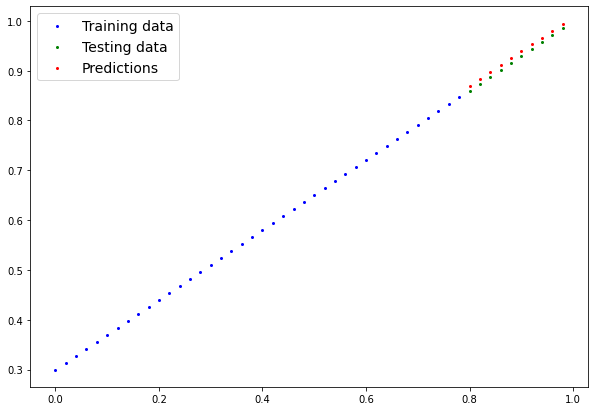

In [109]:
plot_predictions(predictions=Y_preds_new)

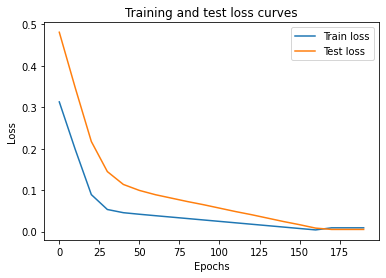

In [110]:
# Plot the loss curves
plt.plot(epoch_count, loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.module.load_state_dict()` - this allows to load a model's saved state dictionary

In [111]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to : models\01_pytorch_workflow_model_0.pth


In [112]:
!ls -l models

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved`state_dict()` into that

In [113]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [114]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [115]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [116]:
# Make some predicitons with our loaded model
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [117]:
# Compare loaded model preds with original model preds
test_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place

In [118]:
# Import PyTorch and matplotlib

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

Create device-agnostic code.

This means if we've got access to a gpu, our code will use it (for potentially faster computing)

If no GPU is available, the code will default to using CPU

In [119]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device : {device}")

Using device : cuda


### 6.1 Data

In [120]:
# Create some data using the linear regression of y = weight * X + bias
weight = 0.2
bias = 0.1

# Create range values
start = 0
end = 1
step = 0.02

# Create X and Y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)     # without unsqueeze, errors will pop-up
Y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.1000],
         [0.1040],
         [0.1080],
         [0.1120],
         [0.1160],
         [0.1200],
         [0.1240],
         [0.1280],
         [0.1320],
         [0.1360]]))

In [121]:
# Split data
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

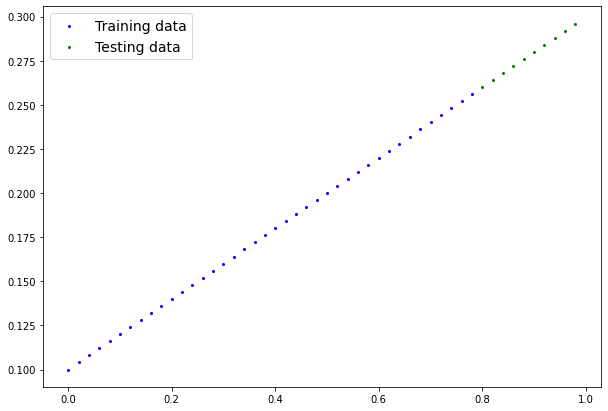

In [122]:
# Plot the data
# Note : if you don't have the plot_predictions() function loaded, this will error

plot_predictions(X_train, Y_train, X_test, Y_test)

### 6.2 Building a PyTorch Linear model

In [123]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        # Use nn.Linear() for creating the model parameters / also called : linear transform, probing layer, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1,        # Input of size 1
                                      out_features=1)        # Output of size 1

    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [124]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [125]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [126]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.003)

In [127]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 1000

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
X_test = X_test.to(device)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    Y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(Y_pred, Y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, Y_test)

        if epochs%10 == 0:
            print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}")

Epoch : 0 | Loss : 0.9501779675483704 | Test loss : 1.2284059524536133
Epoch : 1 | Loss : 0.9467216730117798 | Test loss : 1.2243646383285522
Epoch : 2 | Loss : 0.9432653784751892 | Test loss : 1.2203234434127808
Epoch : 3 | Loss : 0.9398090243339539 | Test loss : 1.2162821292877197
Epoch : 4 | Loss : 0.9363526701927185 | Test loss : 1.2122406959533691
Epoch : 5 | Loss : 0.9328964352607727 | Test loss : 1.2081995010375977
Epoch : 6 | Loss : 0.9294400215148926 | Test loss : 1.204158067703247
Epoch : 7 | Loss : 0.925983726978302 | Test loss : 1.200116753578186
Epoch : 8 | Loss : 0.9225274324417114 | Test loss : 1.196075439453125
Epoch : 9 | Loss : 0.9190711379051208 | Test loss : 1.192034125328064
Epoch : 10 | Loss : 0.9156147837638855 | Test loss : 1.1879929304122925
Epoch : 11 | Loss : 0.9121584892272949 | Test loss : 1.1839516162872314
Epoch : 12 | Loss : 0.9087021946907043 | Test loss : 1.1799103021621704
Epoch : 13 | Loss : 0.9052457809448242 | Test loss : 1.1758689880371094
Epoch :

Epoch : 147 | Loss : 0.44210100173950195 | Test loss : 0.6343355178833008
Epoch : 148 | Loss : 0.43864473700523376 | Test loss : 0.6302942633628845
Epoch : 149 | Loss : 0.43518850207328796 | Test loss : 0.6262530088424683
Epoch : 150 | Loss : 0.4317321479320526 | Test loss : 0.6222116947174072
Epoch : 151 | Loss : 0.4282759130001068 | Test loss : 0.618170440196991
Epoch : 152 | Loss : 0.42481961846351624 | Test loss : 0.6141291856765747
Epoch : 153 | Loss : 0.42136332392692566 | Test loss : 0.6100878715515137
Epoch : 154 | Loss : 0.41790705919265747 | Test loss : 0.6060466170310974
Epoch : 155 | Loss : 0.4144507348537445 | Test loss : 0.6020053625106812
Epoch : 156 | Loss : 0.4109944999217987 | Test loss : 0.5979641079902649
Epoch : 157 | Loss : 0.40753817558288574 | Test loss : 0.5939227938652039
Epoch : 158 | Loss : 0.40408191084861755 | Test loss : 0.5898815393447876
Epoch : 159 | Loss : 0.400625616312027 | Test loss : 0.5858402252197266
Epoch : 160 | Loss : 0.3971693515777588 | Tes

Epoch : 306 | Loss : 0.04432414844632149 | Test loss : 0.11601447314023972
Epoch : 307 | Loss : 0.04417276382446289 | Test loss : 0.11527974903583527
Epoch : 308 | Loss : 0.044021375477313995 | Test loss : 0.11454502493143082
Epoch : 309 | Loss : 0.043869998306035995 | Test loss : 0.11381030082702637
Epoch : 310 | Loss : 0.0437186174094677 | Test loss : 0.11307556927204132
Epoch : 311 | Loss : 0.0435672365128994 | Test loss : 0.11234086006879807
Epoch : 312 | Loss : 0.0434158556163311 | Test loss : 0.11160612106323242
Epoch : 313 | Loss : 0.0432644784450531 | Test loss : 0.11087139695882797
Epoch : 314 | Loss : 0.043113093823194504 | Test loss : 0.11013668030500412
Epoch : 315 | Loss : 0.042961712926626205 | Test loss : 0.10940196365118027
Epoch : 316 | Loss : 0.04281033203005791 | Test loss : 0.10866723209619522
Epoch : 317 | Loss : 0.04266543313860893 | Test loss : 0.1081332191824913
Epoch : 318 | Loss : 0.04254543036222458 | Test loss : 0.10759921371936798
Epoch : 319 | Loss : 0.042

Epoch : 488 | Loss : 0.024668589234352112 | Test loss : 0.05741753801703453
Epoch : 489 | Loss : 0.024564804509282112 | Test loss : 0.05729302391409874
Epoch : 490 | Loss : 0.02446303330361843 | Test loss : 0.056962430477142334
Epoch : 491 | Loss : 0.024358337745070457 | Test loss : 0.05663184076547623
Epoch : 492 | Loss : 0.024257248267531395 | Test loss : 0.056507326662540436
Epoch : 493 | Loss : 0.024152781814336777 | Test loss : 0.05617673322558403
Epoch : 494 | Loss : 0.024050546810030937 | Test loss : 0.05605221912264824
Epoch : 495 | Loss : 0.023947224020957947 | Test loss : 0.05572162941098213
Epoch : 496 | Loss : 0.023843849077820778 | Test loss : 0.05559711530804634
Epoch : 497 | Loss : 0.023741671815514565 | Test loss : 0.055266525596380234
Epoch : 498 | Loss : 0.02363714948296547 | Test loss : 0.055142004042863846
Epoch : 499 | Loss : 0.023536114022135735 | Test loss : 0.05481141805648804
Epoch : 500 | Loss : 0.02343141846358776 | Test loss : 0.05448082834482193
Epoch : 501

Epoch : 660 | Loss : 0.006948497146368027 | Test loss : 0.016011131927371025
Epoch : 661 | Loss : 0.006843795068562031 | Test loss : 0.015680531039834023
Epoch : 662 | Loss : 0.006742567755281925 | Test loss : 0.015555995516479015
Epoch : 663 | Loss : 0.006638233549892902 | Test loss : 0.01522540207952261
Epoch : 664 | Loss : 0.006535862572491169 | Test loss : 0.015100863762199879
Epoch : 665 | Loss : 0.006432674825191498 | Test loss : 0.01477026380598545
Epoch : 666 | Loss : 0.006329160183668137 | Test loss : 0.014645728282630444
Epoch : 667 | Loss : 0.0062271119095385075 | Test loss : 0.014315134845674038
Epoch : 668 | Loss : 0.00612245500087738 | Test loss : 0.014190596528351307
Epoch : 669 | Loss : 0.006021552253514528 | Test loss : 0.013859996572136879
Epoch : 670 | Loss : 0.0059168534353375435 | Test loss : 0.013529402203857899
Epoch : 671 | Loss : 0.005814891308546066 | Test loss : 0.013404867611825466
Epoch : 672 | Loss : 0.0057112909853458405 | Test loss : 0.013074270449578762

Epoch : 840 | Loss : 0.0018054262036457658 | Test loss : 0.0012111514806747437
Epoch : 841 | Loss : 0.0016508704284206033 | Test loss : 0.00283014471642673
Epoch : 842 | Loss : 0.0018054262036457658 | Test loss : 0.0012111514806747437
Epoch : 843 | Loss : 0.0016508704284206033 | Test loss : 0.00283014471642673
Epoch : 844 | Loss : 0.0018054262036457658 | Test loss : 0.0012111514806747437
Epoch : 845 | Loss : 0.0016508704284206033 | Test loss : 0.00283014471642673
Epoch : 846 | Loss : 0.0018054262036457658 | Test loss : 0.0012111514806747437
Epoch : 847 | Loss : 0.0016508704284206033 | Test loss : 0.00283014471642673
Epoch : 848 | Loss : 0.0018054262036457658 | Test loss : 0.0012111514806747437
Epoch : 849 | Loss : 0.0016508704284206033 | Test loss : 0.00283014471642673
Epoch : 850 | Loss : 0.0018054262036457658 | Test loss : 0.0012111514806747437
Epoch : 851 | Loss : 0.0016508704284206033 | Test loss : 0.00283014471642673
Epoch : 852 | Loss : 0.0018054262036457658 | Test loss : 0.00121

In [128]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2020]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1010], device='cuda:0'))])

In [129]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    Y_preds = model_1(X_test)

Y_preds

tensor([[0.2626],
        [0.2667],
        [0.2707],
        [0.2748],
        [0.2788],
        [0.2829],
        [0.2869],
        [0.2909],
        [0.2950],
        [0.2990]], device='cuda:0')

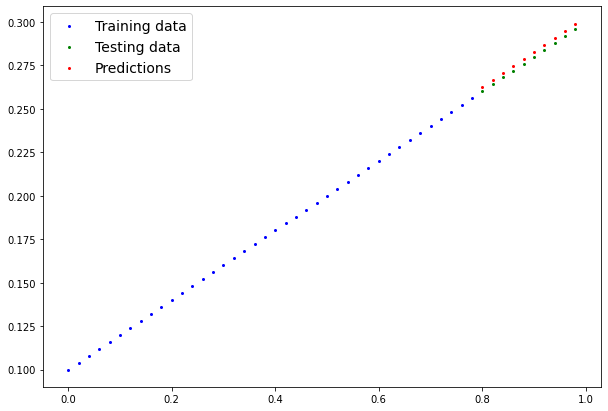

In [130]:
# Check out our model predictions visually
plot_predictions(X_train.cpu(), Y_train.cpu(), X_test.cpu(), Y_test.cpu(), predictions=Y_preds.cpu())

### 6.5 Saving & loading a trained model

In [131]:
# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
          f=MODEL_SAVE_PATH)

Saving model to : models\01_pytorch_workflow_model_1.pth


In [132]:
# Load a PyTorch

# Create a new instance of Linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [133]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [134]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2020]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1010], device='cuda:0'))])

In [135]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

Y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [136]:
## Exercises & Extra-curriculum

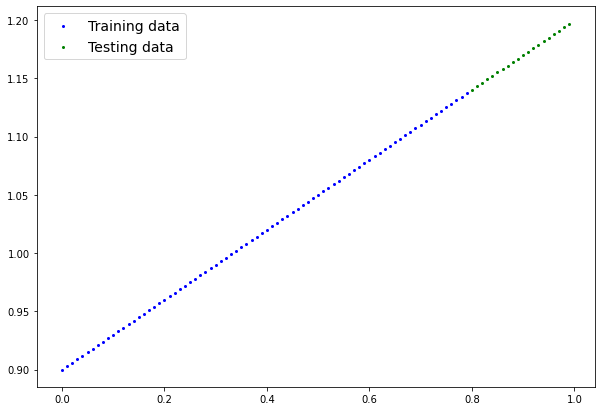

In [137]:
X = torch.arange(0, 1, 0.01)
weight = 0.3
bias = 0.9

Y = weight * X + bias

train_split = int(0.8 * len(X))

X_train = X[:train_split]
X_test = X[train_split:]
Y_train = Y[:train_split]
Y_test = Y[train_split:]

plot_predictions(X_train, Y_train, X_test, Y_test)

In [138]:
torch.manual_seed(35)
class LinearRegressionModelEx(nn.Module):
    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(torch.randn(1,
                                              requires_grad = True,
                                              dtype = torch.float))

        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))

    def forward(self, X):
        return self.weight * X + self.bias

In [139]:
model_ex = LinearRegressionModelEx()
model_ex.state_dict()

OrderedDict([('weight', tensor([0.9674])), ('bias', tensor([0.6711]))])

In [140]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_ex.parameters(),
                           lr = 0.01)

In [141]:
epochs = 300

model_ex = model_ex.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
Y_train = Y_train.to(device)
Y_test = Y_test.to(device)

for epoch in range(epochs):
    model_ex.train()

    Y_preds = model_ex(X_train)

    loss = loss_fn(Y_preds, Y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if (epochs%20 == 0):
        with torch.inference_mode():
            test_preds = model_ex(X_test)
            test_loss = loss_fn(test_preds, Y_test)
            print(f"Epoch : {epoch} | Loss : {loss} | Test loss : {test_loss}")

Epoch : 0 | Loss : 0.1357356756925583 | Test loss : 0.36499106884002686
Epoch : 1 | Loss : 0.13497303426265717 | Test loss : 0.3615370988845825
Epoch : 2 | Loss : 0.13421037793159485 | Test loss : 0.3580830991268158
Epoch : 3 | Loss : 0.13348813354969025 | Test loss : 0.3549575209617615
Epoch : 4 | Loss : 0.13282407820224762 | Test loss : 0.3518318831920624
Epoch : 5 | Loss : 0.132160022854805 | Test loss : 0.34870627522468567
Epoch : 6 | Loss : 0.13151048123836517 | Test loss : 0.3459112048149109
Epoch : 7 | Loss : 0.13093212246894836 | Test loss : 0.3431161046028137
Epoch : 8 | Loss : 0.13035373389720917 | Test loss : 0.34032103419303894
Epoch : 9 | Loss : 0.12977536022663116 | Test loss : 0.3375259339809418
Epoch : 10 | Loss : 0.12920784950256348 | Test loss : 0.335063636302948
Epoch : 11 | Loss : 0.12870214879512787 | Test loss : 0.33260130882263184
Epoch : 12 | Loss : 0.12819643318653107 | Test loss : 0.33013901114463806
Epoch : 13 | Loss : 0.12769073247909546 | Test loss : 0.3276

Epoch : 227 | Loss : 0.05266697332262993 | Test loss : 0.12360506504774094
Epoch : 228 | Loss : 0.05232428386807442 | Test loss : 0.12284030765295029
Epoch : 229 | Loss : 0.05198157578706741 | Test loss : 0.12207555025815964
Epoch : 230 | Loss : 0.051638878881931305 | Test loss : 0.12131079286336899
Epoch : 231 | Loss : 0.0512961708009243 | Test loss : 0.12054600566625595
Epoch : 232 | Loss : 0.05095347762107849 | Test loss : 0.11978127807378769
Epoch : 233 | Loss : 0.05061141401529312 | Test loss : 0.11867254227399826
Epoch : 234 | Loss : 0.05026904493570328 | Test loss : 0.11790777742862701
Epoch : 235 | Loss : 0.049926336854696274 | Test loss : 0.11714301258325577
Epoch : 236 | Loss : 0.049583639949560165 | Test loss : 0.11637826263904572
Epoch : 237 | Loss : 0.04924093559384346 | Test loss : 0.11561349779367447
Epoch : 238 | Loss : 0.04889823496341705 | Test loss : 0.11484874784946442
Epoch : 239 | Loss : 0.04855553060770035 | Test loss : 0.11408398300409317
Epoch : 240 | Loss : 0.

In [142]:
model_ex.state_dict()

OrderedDict([('weight', tensor([0.4378], device='cuda:0')),
             ('bias', tensor([0.8421], device='cuda:0'))])

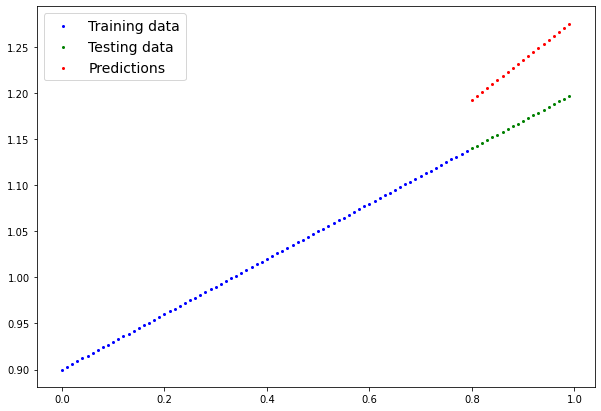

In [143]:
with torch.inference_mode():
    Y_pred = model_ex(X_test)

plot_predictions(X_train.cpu(), Y_train.cpu(), X_test.cpu(), Y_test.cpu(), Y_pred.cpu())

In [144]:
MODEL_PATH = Path("models")
MODEL_NAME = "Model_exercise.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_ex.state_dict(),
          f=MODEL_SAVE_PATH)

In [145]:
loaded_model_ex = LinearRegressionModelEx()

loaded_model_ex.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [146]:
loaded_model_ex.to(device)
loaded_model_ex.state_dict()

OrderedDict([('weight', tensor([0.4378], device='cuda:0')),
             ('bias', tensor([0.8421], device='cuda:0'))])

In [147]:
loaded_model_pred = loaded_model_ex(X_test)
Y_pred == loaded_model_pred

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True], device='cuda:0')

# Chapter 2

Classification is a problem of predicting whether something is one thing or another (there can be multi things as the options)

## 1. Make classification data and get it ready

In [148]:
import sklearn

In [149]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, Y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [150]:
len(X), len(Y)

(1000, 1000)

In [151]:
print(f"First 5 samples of X : \n {X[:5]}")
print(f"First 5 samples of Y : \n {Y[:5]}")

First 5 samples of X : 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of Y : 
 [1 1 1 1 0]


In [152]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                       "label" : Y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


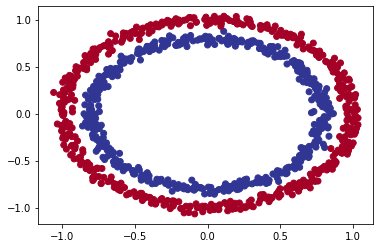

In [153]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=Y,
            cmap=plt.cm.RdYlBu)

Note : The data we're working with is oftem referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to experiment but still sizeable enough to practice the fundamentals.

### 1.1 Check input ant output shapes

In [154]:
X.shape, Y.shape

((1000, 2), (1000,))

In [155]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [156]:
# View the first example of features and labels
X_sample = X[0]
Y_sample = Y[0]

print(f"Values for one sample of X : {X_sample} and the same for Y : {Y_sample}")
print(f"Shapes for one sample of X : {X_sample.shape} and the same for Y : {Y_sample.shape}")

Values for one sample of X : [0.75424625 0.23148074] and the same for Y : 1
Shapes for one sample of X : (2,) and the same for Y : ()


### 1.2 Turn data into tensors and create train and test splits

In [157]:
type(X), type(Y)

(numpy.ndarray, numpy.ndarray)

In [158]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)

In [159]:
type(X), type(Y), X.dtype, Y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [160]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size = 0.2,    # 0.2 = 20% of data will be test & 80% will train
                                                    random_state = 42)

In [161]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(800, 200, 800, 200)

## 2. Building a Model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnoistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [162]:
# Import PyTorch and nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and sent it to the target `device`

In [163]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features = 2,
                                 out_features = 5) # takes in 2 features and upscales to 5 features
        self.layer_2 = nn.Linear(in_features = 5,
                                 out_features = 1) # takes in 5 features from previous layer ad outputs a single feature (same shape as Y)
        # 3. Define a forward() method that outlines the forward pass
        def forward(self, X):
            return self.layer_2(self.layer_1(X)) # X -> layer_1 -> layer_2 -> Output

# 4. Instatiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [164]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [165]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.4071, -0.4279],
                      [ 0.0067, -0.2897],
                      [-0.1868,  0.4851],
                      [ 0.5059, -0.3362],
                      [ 0.1933, -0.1522]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.4476, 0.2673, 0.6501, 0.5702, 0.3187], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.4201,  0.1119,  0.2938,  0.2119, -0.0559]], device='cuda:0')),
             ('layer_2.bias', tensor([0.2067], device='cuda:0'))])

In [166]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [167]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0152, -0.4239],
                      [-0.6227,  0.1211],
                      [ 0.4534, -0.5465],
                      [ 0.2424, -0.6766],
                      [ 0.5701,  0.6093]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.4568,  0.5139,  0.4444, -0.6473,  0.1252], device='cuda:0')),
             ('1.weight',
              tensor([[0.3847, 0.0823, 0.3482, 0.3686, 0.0767]], device='cuda:0')),
             ('1.bias', tensor([-0.2861], device='cuda:0'))])

In [168]:
# Make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions : {len(untrained_preds)}, Shape : {untrained_preds.shape}")
print(f"Length of test samples : {len(X_test)}, Shape : {X_test.shape}")
print(f"\nFirst 10 predictions : \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels : \n{Y_test[:10]}")

Length of predictions : 200, Shape : torch.Size([200, 1])
Length of test samples : 200, Shape : torch.Size([200, 2])

First 10 predictions : 
tensor([[-1.],
        [-1.],
        [-0.],
        [-1.],
        [ 0.],
        [ 0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.]], device='cuda:0')

First 10 labels : 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again... this is problem specific.

For example for regression you might want MAE or MSE (mean absolute erroror mean squared error).

For classification you might want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures how *wrong* your model's predictions are.

In [ ]:
loss_fn = 